# SVM model

#### In this notebook, two Support Vector Machine classication models will be developed. First, text data will be converted into a structured numeric dataframe using Countvectorizer and then TF-IDF Vectorizer.

Importing libraries:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score


Loading and merging data:

In [15]:
crypto = pd.read_csv('../data/sub-crypto.csv')
eco = pd.read_csv('../data/sub-economics.csv')

# Merging both together
data = crypto.append(eco)
data.head()

,subreddit,title
0,CryptoMarkets,Polychain and Celo Validator Community Bootstr...
1,CryptoMarkets,What's the Economics Of Public Goods ? :O
2,CryptoMarkets,Invesco pulls Bitcoin ETF application and othe...
3,CryptoMarkets,New York State Watchdog Orders Two Crypto Firm...
4,CryptoMarkets,New milestone: ProShares Bitcoin ETF goes publ...


In [16]:
data.shape

(20000, 2)

One hot encoding 'subreddit' column:

In [17]:
data['subreddit'].replace({'CryptoMarkets': 0, 'Economics': 1}, inplace = True)

# Displaying first 5 rows
data.head()

,subreddit,title
0,0,Polychain and Celo Validator Community Bootstr...
1,0,What's the Economics Of Public Goods ? :O
2,0,Invesco pulls Bitcoin ETF application and othe...
3,0,New York State Watchdog Orders Two Crypto Firm...
4,0,New milestone: ProShares Bitcoin ETF goes publ...


Shuffling the data:

In [18]:
# code from: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
data = data.sample(frac = 1)

# Displaying first 5 rows
data.head()

,subreddit,title
2143,1,Inflation: Normal Economic Phenomenon or Resul...
4568,1,Are Governments to blame? (Poor Economics - Ab...
6977,1,IELTS ACADEMIC WRITING: KEY STEPS IN TASK 2
9207,0,Cross The Ages a Card Game
704,1,"Do you know you can make $5,000 daily with bit..."


Defining matrixes:

In [19]:
X = data['title'] #Feature matrix
y = data['subreddit'] #Target matrix

In [9]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

Train/Test splitting, fitting and transforming (CountVectorizer):

In [10]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=42
)

In [9]:
# Vectorize and plot but using 'english' stopwords and bigrams
cv = CountVectorizer(stop_words='english', ngram_range=(2,2)) #ngram_range: only bigrams

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [10]:
# Baseline score
y_test.value_counts(normalize=True)[0]

0.49366666666666664

Instantiating, fitting Support Vector Machine and measuring performance:

In [23]:
# Instantiate SVM:
svc = SVC()

In [24]:
# Fit SVM to training data.
svc.fit(X_train, y_train)

SVC()

In [25]:
# Predictions.
y_pred = svc.predict(X_test)

In [27]:
# Measure performance based on accuracy.
print('train score:', svc.score(X_train, y_train))
print('test score:', svc.score(X_test, y_test))

train score: 0.9708571428571429
test score: 0.7008333333333333


Instantiating KFold and Gridsearch:

In [29]:
#KFold:
kf = KFold(5, shuffle=True, random_state=42)

params = {
    'C': np.linspace(0.001, 100, 25),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3], # only relevant for poly kernel
    'gamma': ['scale', 'auto']
}

model = SVC(random_state=42)

#Gridsearch:
gs = GridSearchCV(model, params, cv=kf, n_jobs=-1, verbose=1)

# Fit on training data.
gs.fit(X_train, y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [30]:
gs.best_params_

{'C': 4.167625, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}

Measure performance:

In [31]:
gs.best_score_

0.759857142857143

In [32]:
#Accuracy:
gs.score(X_test, y_test)

0.786

## Let's try again with TD-IDF Vectorizer

Train/Test splitting, fitting and transforming (TF-IDF Vectorizer):

In [20]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=42
)

In [21]:
# Vectorize and plot but using 'english' stopwords, unigrams and bigrams
tvec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X_train = tvec.fit_transform(X_train)
X_test = tvec.transform(X_test)

In [22]:
# Baseline score
y_test.value_counts(normalize=True)[0]

0.5

Instantiating KFold and Gridsearch:

In [23]:
# Instantiate SVM.


kf = KFold(5, shuffle=True, random_state=42)

params = {
    'C': np.linspace(0.001, 100, 25),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3], # only relevant for poly kernel
    'gamma': ['scale', 'auto']
}

model = SVC(random_state=42)

gs = GridSearchCV(model, params, cv=kf, n_jobs=-1, verbose=1)

# Fit on training data.
gs.fit(X_train, y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [24]:
gs.best_params_

{'C': 4.167625, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

Measure performance:

In [25]:
gs.best_score_

0.9017857142857142

In [26]:
# Accuracy score model on training set.
gs.score(X_train, y_train)

0.9968571428571429

In [27]:
# Accuracy score model on testing set.
gs.score(X_test, y_test)

0.9136666666666666

Confusion Matrix:

In [28]:
# Predictions
preds_tvec = gs.predict(X_test)

# Confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

# Specificity and precision
spec = tn / (tn + fp) 
prec = tp / (tp + fp) 

print('Specificity:', spec)
print('Precision:', prec)

Specificity: 0.9236666666666666
Precision: 0.922108843537415


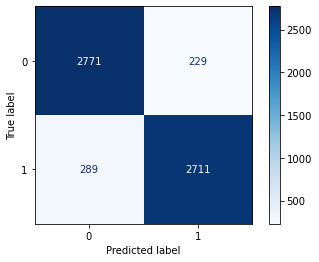

In [29]:
# visualize confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

## Receiver Operating Characteristic (ROC) Curve

This curve helps us visualize our tradeoff between _sensitivity_ and _specificity_ and understand how well-separated our populations are.

### Interpreting ROC AUC
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides.

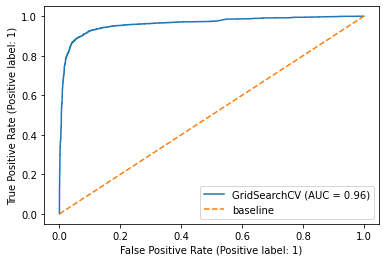

In [33]:
# ROC curve
plot_roc_curve(gs, X_test, y_test)

# Worst case scenario line
plt.plot([0, 1], [0, 1], label="baseline", linestyle="--")


plt.legend();

In [41]:
# ROC AUC score
roc_auc_score(y_test, gs.decision_function(X_test)) #Binary classification - doc

0.961775888888889